# Titanic Data 
##04-01. Titanic - 타이타닉 데이터 실습
https://wikidocs.net/89364

###대회 설명

URL
https://www.kaggle.com/c/titanic (Titanic: Machine Learning from Disaster)

설명

인공지능 기법을 사용하여 타이타닉 난파선에서 살아남은 승객을 예측하는 모델을 만듭니다.
생존과 관련된 여러 요소가 있지만 일부 사람들은 다른 사람들보다 생존 할 가능성이 더 높은 것으로 보입니다. 이 대회에서 우리는 “어떤 종류의 사람들이 살아남을 가능성이 더 높습니까?”라는 질문에 대답하는 예측 모델을 구축하여야 합니다
평가방법

승객 데이터 (예 : 이름, 연령, 성별, 사회 경제적 클래스 등) 사용하여 승객이 타이타닉 침몰에서 살아남았는지 예측하는 것이 임무입니다. 테스트 세트의 각각에 대해 변수의 0 또는 1 값을 예측해야 합니다.
데이터
survival - 생존여부 ( 0 = No, 1 = Yes )
pclass - 티켓 등급 ( 1 = 1st, 2 = 2nd, 3 = 3rd )
sex - 성별
Age - 나이
sibsp - 타이타닉에 승선한 형제자매 또는 배우자의 수
parch - 타이타닉에 승선한 부모 - 자식의 수
ticket - 티켓 번호
fare - 승선 요금
cabin - 선실 번호
embarked - 승선 항구 이름 ( C = Cherbourg, Q = Queenstown, S = Southampton )

##04-01-01. 데이터 전처리 실습
https://wikidocs.net/89364

###필요 모듈 및 자료 설치&불러오기


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 필요모듈 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###01. csv 파일을 데이터프레임으로 로드하기
* 코드

train = pd.read_csv('../input/titanic/train.csv')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/이어드림자료/PythonAdvanced_변치웅 강사님/프로젝트오리엔테이션/titanic.csv')

###02. 로드한 데이터 셋에 결측치가 있는지 확인하기



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


###03. 학습 데이터 셋의 상위 5개 항목 출력



In [ ]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


###04. 학습 데이터 셋의 각 필드 데이터 분포(평균, 최소값, 최대값 등)를 살펴보기



In [ ]:
train.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


###05. 각 컬럼의 데이터 타입 확인하기



In [ ]:
train.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

###06. 'Cabin', 'Embarked'필드에는 어떤 값이 있는지 확인하기



In [ ]:
print(train.cabin.unique())
print(train.embarked.unique())

['B5' 'C22 C26' 'E12' 'D7' 'A36' 'C101' nan 'C62 C64' 'B35' 'A23'
 'B58 B60' 'D15' 'C6' 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T' 'A31' 'C7'
 'C103' 'D22' 'E33' 'A21' 'B10' 'B4' 'E40' 'B38' 'E24' 'B51 B53 B55'
 'B96 B98' 'C46' 'E31' 'E8' 'B61' 'B77' 'A9' 'C89' 'A14' 'E58' 'E49' 'E52'
 'E45' 'B22' 'B26' 'C85' 'E17' 'B71' 'B20' 'A34' 'C86' 'A16' 'A20' 'A18'
 'C54' 'C45' 'D20' 'A29' 'C95' 'E25' 'C111' 'C23 C25 C27' 'E36' 'D34'
 'D40' 'B39' 'B41' 'B102' 'C123' 'E63' 'C130' 'B86' 'C92' 'A5' 'C51' 'B42'
 'C91' 'C125' 'D10 D12' 'B82 B84' 'E50' 'D33' 'C83' 'B94' 'D49' 'D45'
 'B69' 'B11' 'E46' 'C39' 'B18' 'D11' 'C93' 'B28' 'C49' 'B52 B54 B56' 'E60'
 'C132' 'B37' 'D21' 'D19' 'C124' 'D17' 'B101' 'D28' 'D6' 'D9' 'B80' 'C106'
 'B79' 'C47' 'D30' 'C90' 'E38' 'C78' 'C30' 'C118' 'D36' 'D48' 'D47' 'C105'
 'B36' 'B30' 'D43' 'B24' 'C2' 'C65' 'B73' 'C104' 'C110' 'C50' 'B3' 'A24'
 'A32' 'A11' 'A10' 'B57 B59 B63 B66' 'C28' 'E44' 'A26' 'A6' 'A7' 'C31'
 'A19' 'B45' 'E34' 'B78' 'B50' 'C87' 'C116' 'C55 C57' 'D50'

###07. 생존한 사람, 사망한 사람의 수 확인하기



In [ ]:
print(f'survivied : {(train.survived == 1).sum()}')
print(f'not survivied : {(train.survived == 0).sum()}')

survivied : 500
not survivied : 809


###08. 각 클래스('Pclass')별 탑승객 분포 확인하기



In [ ]:
train['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

###09. 성('Sex')별 탑승객 분표 확인하기



In [ ]:
train['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

###11. 'Embarked' 필드의 결측치는 값이 가장 많은 'S'로 할당하기



In [ ]:
train['embarked'] = train['embarked'].fillna('S')

In [ ]:
train['embarked'].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

###12. 'Age' 필드의 결측치는 값이 중간값으로 할당하기



In [ ]:
train['age'] = train['age'].fillna(train['age'].median())

###13. 'Name'필드에서 신분을 나타내는 단어를 뽑아서 'Title' 필드에 할당하기



In [ ]:
train['title'] = train['name'].str.extract('([A-Za-z]+)\.', expand=False)
#() 그룹 처리, []문자선택 대문자 A-Z 소문자a-z 다 포함. +문자열 반복 \탈출 .이 존재함 => 어떤 문자열이든 .으로 끝나는 문자열 추출

In [ ]:
train['title']

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

In [ ]:
train['title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Capt          1
Sir           1
Dona          1
Jonkheer      1
Countess      1
Don           1
Mme           1
Lady          1
Name: title, dtype: int64

###14. 'Title' 필드의 카테고리를 6개의 항목으로 변경하기



In [ ]:
train['title'] = train['title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
#'Capt', 'Col', 'Major', 'Dr', 'Rev' => 군인(대령), 대령, 소령, 의사, 목사
train['title'] = train['title'].replace(['Jonkheer', 'Master'], 'Master')
# Jonkheer, Master => 작위없는 귀족, 교사 혹은 학위 소지자
train['title'] = train['title'].replace(['Don', 'Sir', 'the Countess', 'Lady', 'Dona'], 'Royalty')
# 귀족 명칭
train['title'] = train['title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
#성별 중 기혼
train['title'] = train['title'].replace(['Mlle', 'Miss'], 'Miss')
#성별 중 미혼
train['title'] = train['title'].replace(['Mr'], 'Mr')
#성별 남성

###16. 변수 y를 선언해서 학습할 목표변수(=종속변수)인 'Survived'필드값을 담기



In [ ]:
y = train.survived

###17. 나이('Age') 필드를 그룹핑하여 'AgeGroup'필드 생성하여 할당하기

In [ ]:
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
train['ageGroup'] = pd.cut(train['age'], bins=bin, labels=group_names)
train['ageGroup'].value_counts()

YoungAdult    544
MiddleAged    289
Youth         250
Baby          193
Senior         33
Name: ageGroup, dtype: int64

##04-01-02. 데이터 시각화 실습
https://wikidocs.net/89365


###01. 필요한 라이브러리 Import


In [ ]:
# 필요모듈 import #위와 동일

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###02. 학습 데이터셋(train)의 데이터 분포확인하기


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


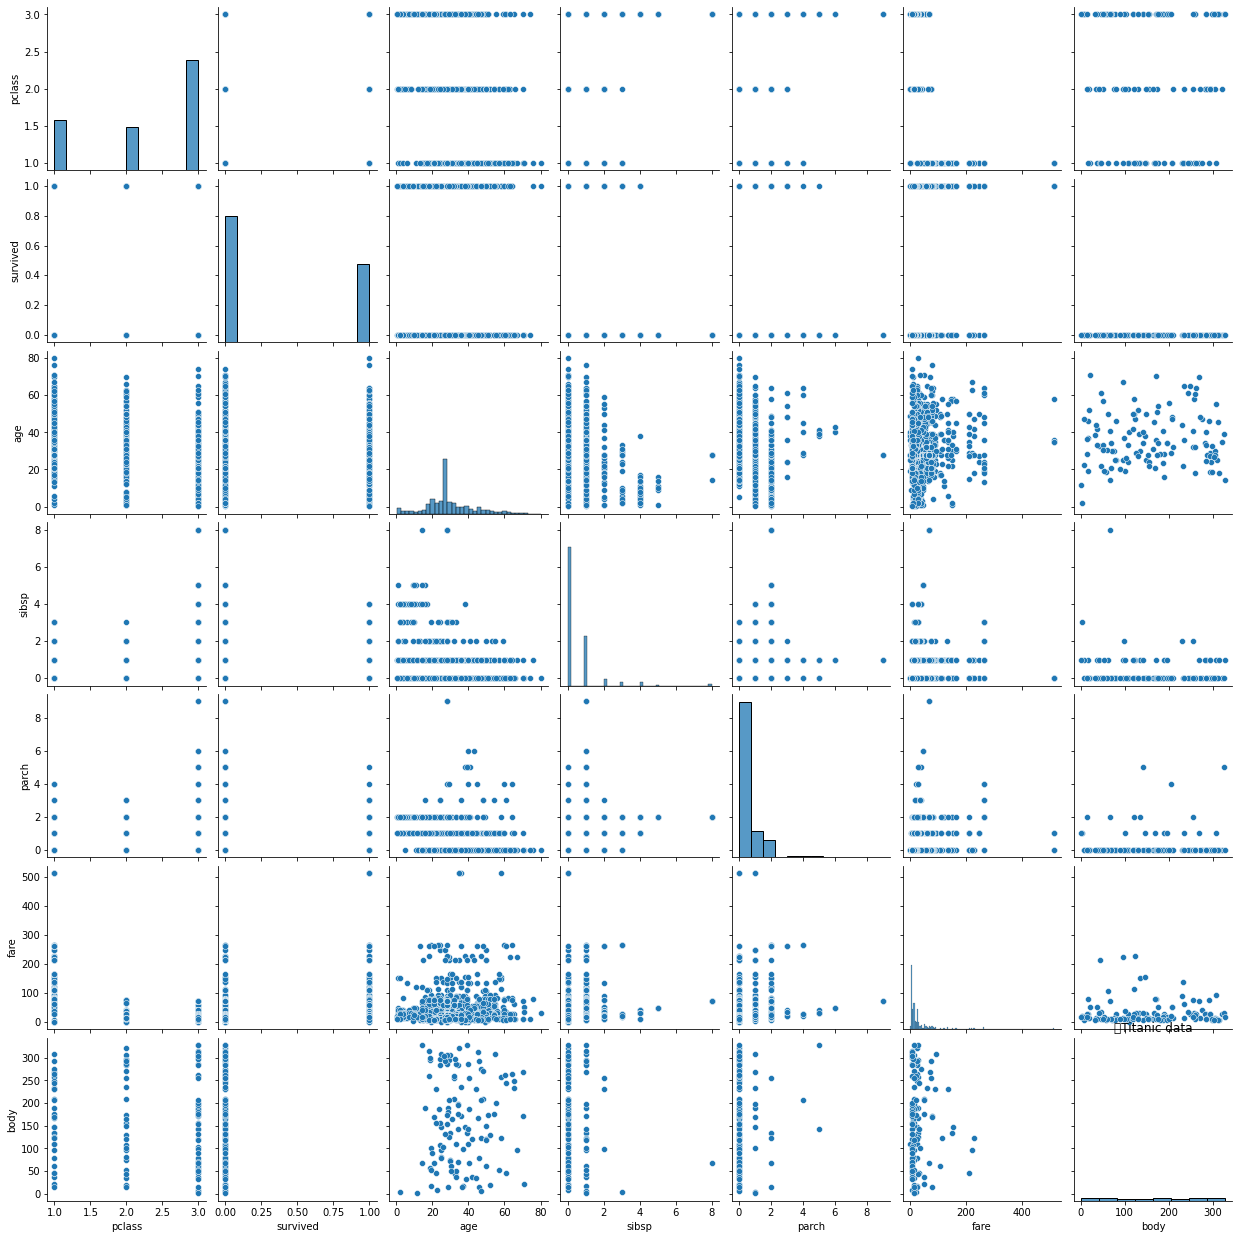

In [ ]:
sns.pairplot(train)
plt.title("Titanic data")
plt.show()

###03. 성별('Sex')의 생존여부('Survived') 데이터 분포확인하기 : barplot

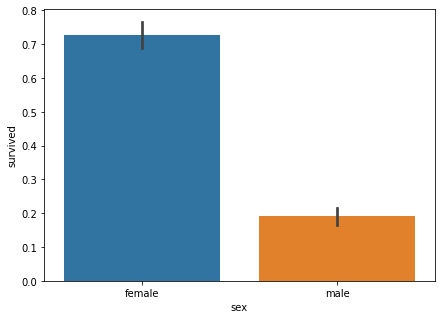

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(data=train, x='sex', y='survived')
plt.show()

###04. 탑승 클래스('Pclass')별 + 성별('Sex') 생존여부('Survived') 데이터 분포확인하기 : barplot

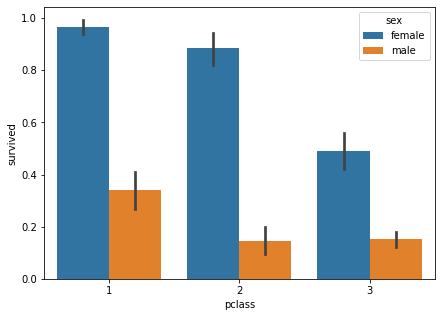

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(data=train, x='pclass', y='survived', hue='sex')
plt.show()

###05. 전체 변수의 correlation에 대해 히트맵 그리기

In [ ]:
train_corr = train.corr()

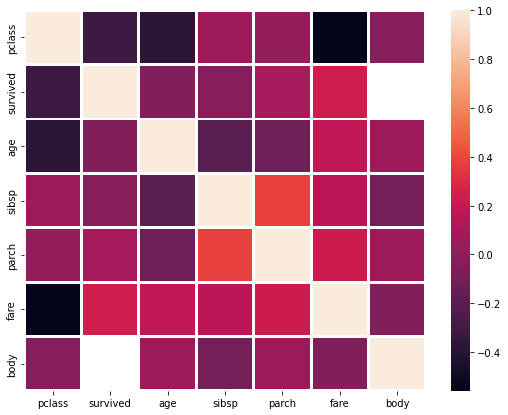

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(data=train_corr, linewidths=2)
plt.show()

###06. 연령분포('AgeGroup')별 + 클래스('Pclass')별 생존여부('Survived') 데이터 분포확인하기: barplot

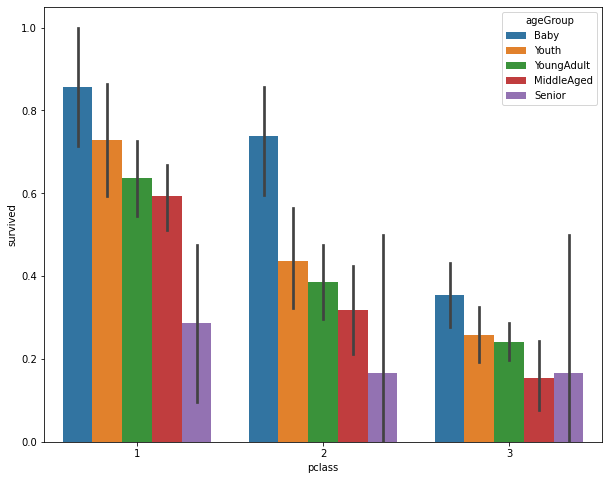

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=train, x='pclass', y='survived', hue='ageGroup')
plt.show()

###07. 형제/자매수("SibSp")별 + 클래스('Pclass') 별 생존여부("Survived")

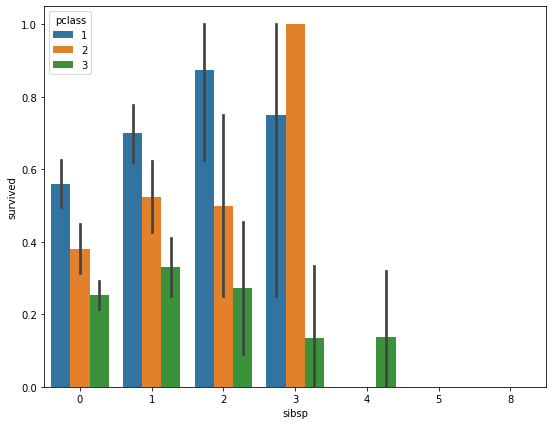

In [ ]:
plt.figure(figsize=(9,7))
sns.barplot(data=train, x='sibsp', y='survived', hue='pclass')
plt.show()

##04-01-03. 모델 생성 실습
https://wikidocs.net/89366 => 오류 많고 문맥 안 맞아서 다른 거 같이 참조
데이터 전처리 및 정리 참조 : https://ashhyun.github.io/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/ML_splitting_dataset/

모델 참조 : https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

###01. 필요한 라이브러리 import

In [ ]:
# 코드
from sklearn.preprocessing import LabelEncoder

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/스터디/group_offline6/titanic_train.csv')
genSub = pd.read_csv('/content/drive/MyDrive/스터디/group_offline6/titanic_gender_submission.csv')
# kaggle 데이터 받아옴

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 전처리 - 셀프&참조
1. 문자열 및 NaN 데이터 처리
2. Ticket, Fare의 자료형과 Scailing 문제 처리 하기.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/스터디/group_offline6/titanic_train.csv')
genSub = pd.read_csv('/content/drive/MyDrive/스터디/group_offline6/titanic_gender_submission.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/스터디/group_offline6/titanic_test.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 전처리 하기 - Sex, Embarked 숫자로 변환하기 - train
label = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train[col] = label.fit_transform(train[col])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [ ]:
# 전처리 하기 - Sex, Embarked 숫자로 변환하기 - test
label = LabelEncoder()
for col in ['Sex', 'Embarked']:
    test[col] = label.fit_transform(test[col])
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [ ]:
# 전처리 하기 - Name에서 prefix 뽑기 - train
for dataset in train:
    train['Prefix'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Prefix'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Prefix, dtype: int64

In [ ]:
# prefix 숫자로 만들기. - train
dic = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
train['Prefix'] = train['Prefix'].map(dic)

In [ ]:
train.set_index('PassengerId', inplace=True)

In [ ]:
train = train.drop('Name', axis=1)

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
PassengerId,,,,,,,,,,,
1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0
2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,2
3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1
4,1,1,0,35.0,1,0,113803,53.1000,C123,2,2
5,0,3,1,35.0,0,0,373450,8.0500,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,211536,13.0000,NaN,2,4
888,1,1,0,19.0,0,0,112053,30.0000,B42,2,1
889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,2,1


In [ ]:
# 전처리 하기 - Name에서 prefix 뽑기 - test
for dataset in test:
    test['Prefix'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Prefix'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Prefix, dtype: int64

In [ ]:
# prefix 숫자로 만들기. - test
dic = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
test['Prefix'] = test['Prefix'].map(dic)

In [ ]:
test.set_index('PassengerId', inplace=True)

In [ ]:
test = test.drop('Name', axis=1)

In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
PassengerId,,,,,,,,,,
892,3,1,34.5,0,0,330911,7.8292,NaN,1,0
893,3,0,47.0,1,0,363272,7.0000,NaN,2,2
894,2,1,62.0,0,0,240276,9.6875,NaN,1,0
895,3,1,27.0,0,0,315154,8.6625,NaN,2,0
896,3,0,22.0,1,1,3101298,12.2875,NaN,2,2


In [ ]:
# null 값 처리하기 - train
train['Age'] = train['Age'].fillna(train['Age'].median()) # 중앙값
train['Fare'] = train['Fare'].fillna(train['Fare'].mean()) # 평균

In [ ]:
# null 값 처리하기 - test
test['Age'] = test['Age'].fillna(test['Age'].median()) # 중앙값
test['Fare'] = test['Fare'].fillna(test['Fare'].mean()) # 평균

In [ ]:
# Ticket, Cabin 삭제하기 - train & test
train = train.drop(train[['Ticket','Cabin']], axis=1)
test = test.drop(test[['Ticket','Cabin']], axis=1)

In [ ]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Prefix      0
dtype: int64

In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Prefix      0
dtype: int64

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2,0
2,1,1,0,38.0,1,0,71.2833,0,2
3,1,3,0,26.0,0,0,7.9250,2,1
4,1,1,0,35.0,1,0,53.1000,2,2
5,0,3,1,35.0,0,0,8.0500,2,0


In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,0
893,3,0,47.0,1,0,7.0000,2,2
894,2,1,62.0,0,0,9.6875,1,0
895,3,1,27.0,0,0,8.6625,2,0
896,3,0,22.0,1,1,12.2875,2,2


In [ ]:
# 전처리 준비 끝 
# 모델링!

In [ ]:
# pd.crosstab(train['Prefix'], train['Sex'])

##안씀

###02. 학습을 위한 데이터 준비, 'Name', 'Ticket', 'SibSp', 'Parch', 'Cabin' , 'AgeGroup'컬럼 삭제하기

In [ ]:
#train = train.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'Cabin'], axis=1)
# 문맥 상 안 맞음... 있지도 않은 Title은 뭔데..

###03. 모델링에 사용할 변수의 타입을 숫자로 변환

In [ ]:
#train['Sex'].dtypes # dtype('O') == Object

In [ ]:
#train['Sex'] = train['Sex'].astype(str)

In [ ]:
#label = LabelEncoder()
#for col in ['Sex', 'Embarked']:
#    train[col] = label.fit_transform(train[col])
# 'Title', 'AgeGroup' => Title은 drop 하면서 삭제

###04. 학습시킬 변수와 Label변수를 분리.

In [ ]:
#X_train = train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']] #'PassengerId', 'Title', 'AgeGroup'
#Y_train = train[['Survived']]

###05. train dataset의 Survived컬럼과 다른 변수들 간의 상관관계를 확인.

In [ ]:
# X_train.corr()['Survived'] # 에러 남
# train.corr()['Survived']

###05. train 데이터셋과 차원 맞춰주기.

In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,0
893,3,0,47.0,1,0,7.0000,2,2
894,2,1,62.0,0,0,9.6875,1,0
895,3,1,27.0,0,0,8.6625,2,0
896,3,0,22.0,1,1,12.2875,2,2


In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2,0
2,1,1,0,38.0,1,0,71.2833,0,2
3,1,3,0,26.0,0,0,7.9250,2,1
4,1,1,0,35.0,1,0,53.1000,2,2
5,0,3,1,35.0,0,0,8.0500,2,0


In [ ]:
# test = test.drop(['Age', 'PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Cabin', 'Embarked'], axis=1)
# 크기 아예 안 맞음..;
# test = test.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'Cabin'], axis=1)

###06. 'Sex'컬럼을 Object형에서 Interger(Number)형으로 변환해주기.

In [ ]:
#test['Sex'] = label.fit_transform(test['Sex'])

In [ ]:
# Embarked 맞춰주기
#label = LabelEncoder()
#for col in ['Sex', 'Embarked']:
#    train[col] = label.fit_transform(train[col])

###07. test 데이터셋 Null 값 확인하기.

In [ ]:
#test['Sex'] = label.fit_transform(test['Sex'])

In [ ]:
#test

###02. TEST dataset 로드하기.

In [ ]:
#test = pd.read_csv('/content/drive/MyDrive/스터디/group_offline6/titanic_test.csv')

###03. Test dataset null값 확인.

In [ ]:
#test.isnull().sum()

###04. Test dataset null값 처리하기.

In [ ]:
# test['Age'] = test['Age'].fillna(test['Age'].median()) # 중앙값
#test['Fare'] = test['Fare'].fillna(test['Fare'].mean()) # 평균

##Logistic Regression

###01. 필요한 라이브러리 Import 및 모델 객체 생성

In [ ]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()

###08. Logistic Regression모델로 예측하기.

In [ ]:
# pred = lr.predict(test)

In [ ]:
X_train = train.drop("Survived", axis=1) 
Y_train = train["Survived"] 
X_test = test
# X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
# PassengerId - > index 화 처리

((891, 8), (891,), (418, 8))

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# 평가 지표
from sklearn.metrics import accuracy_score

In [ ]:
# LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)
Y_pred = logReg.predict(X_test)
acc_log = round(logReg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


81.37

In [ ]:
print(logReg.score(X_train, Y_train))

0.813692480359147


In [ ]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logReg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,Prefix,0.503818
5,Fare,0.003581
2,Age,-0.037717
6,Embarked,-0.204922
4,Parch,-0.210012
3,SibSp,-0.405663
0,Pclass,-0.948463
1,Sex,-2.222911


In [ ]:
# SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.46

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


81.48

In [ ]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.85

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.13

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

70.93

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

64.31

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.20
8,Decision Tree,98.20
1,KNN,84.85
7,Linear SVC,81.48
2,Logistic Regression,81.37
4,Naive Bayes,80.13
5,Perceptron,70.93
0,Support Vector Machines,68.46
6,Stochastic Gradient Decent,64.31


##Submission 파일에 예측값 적용하기

###09. submission 파일 로드

In [ ]:
genSub = pd.read_csv('/content/drive/MyDrive/스터디/group_offline6/titanic_gender_submission.csv')

###10. gender_submission데이터 프레임의 "Survived"컬럼을 예측값으로 바꾸기.

In [ ]:
submission = pd.DataFrame({
    #"PassengerId": test["PassengerId"], # index 처리화 함
    "Survived": Y_pred
})

###11. 예측값을 적용한 gender_submission파일을 write하기.

In [ ]:
genSub.to_csv('/content/drive/MyDrive/스터디/group_offline6/titanic_submission2.csv', index=False)